# Lab 3: Campos Vectoriales Planares

Para sistemas de EDOs en 2D es posible tener una descripción cualitativa y geométrica del comportamiento del sistema
gracias a que podemos visualizar el comportamiento de las 2 variables en un plano.

Este cuaderno explora el modelo FitzHugh-Nagumo, un sistema simplificado que describe el comportamiento de membranas neuronales. Dividiremos el análisis en varias secciones: cálculo del retrato de fase, cálculo de las curvas nulas (nullclines), identificación de puntos de equilibrio y su estabilidad, y exploraremos cómo una bifurcación puede ser inducida por cambios en la corriente externa.

Para este análisis, usamos las ecuaciones:

$$
\frac{dV}{dt}=V-\frac{V^3}{3}-w+I_{ext} \\
\frac{dw}{dt}=\frac{1}{\tau}(V+a-bw)
$$

donde:

- $V$: Potencial de membrana.
- $w$: Variable de recuperación
- $I_{ext}$: Corriente externa constante.
- $a$, $b$, y $\tau$: parámetros de ajuste.

Usando los valores de parámetros $a = 0.3$, $b = 1.4$ y $\tau = 20$, realice los siguientes ejercicios:

## Ejercicio 1: Protocolo de Estimulación por pulsos

Simule el sistema de FN en el intervalo (-50,300) el -50 hace que cuando grafiquemos el tiempo desde 0, el sistema habrá ya evolucionado hacia el atractor adecuado. Use un protocolo de estimulación usando $I_{ext}(t)$ = 0.05 en el
intervalo $10<t<15$, 0.1 en $110<t<115$ y 0.15 en $210<t<215$.

Grafique las soluciones de $V$y $w$ en el tiempo, grafique en un panel debajo también la corriente de estimulación. Finalmente en otro panel muestre el resultado de las trayectorias en el espacio de estados. Describa sus observaciones.

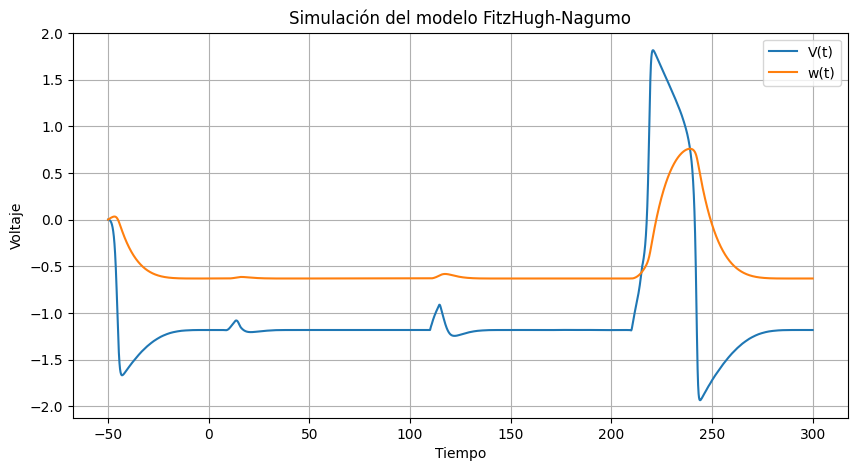

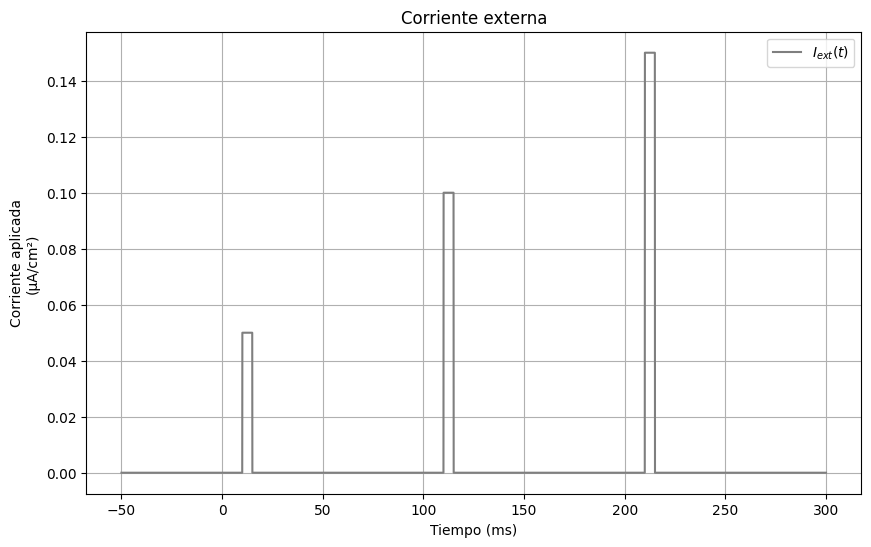

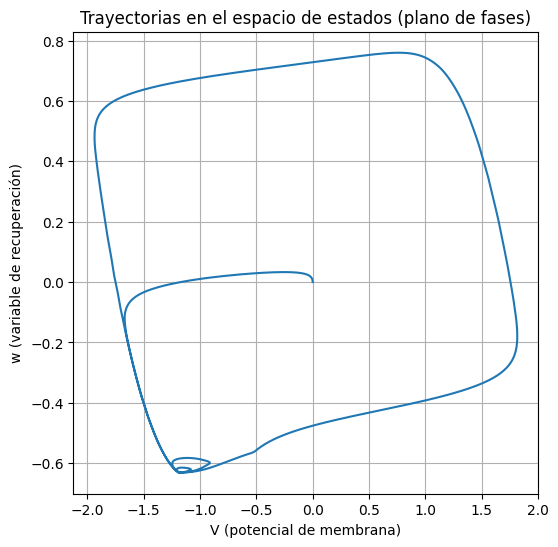

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Parámetros del sistema ---
a = 0.3
b = 1.4
tau = 20

inicio_pulsos = [10, 110, 210]           # Tiempos de inicio de cada pulso (ms)
amplitud_pulso = [0.05, 0.1, 0.15]   # Amplitud fija para cada pulso (μA/cm^2)
duracion_pulso = 5         # Duración de cada pulso (ms)
tiempo_simulacion = 300     # Duración de la simulación (ms)
inicio_simulacion = -50    #En qué tiempo inicia la simulación


def I_ext_func(t):
     for inicio, amp in zip(inicio_pulsos, amplitud_pulso):
        if inicio <= t <= inicio + duracion_pulso:
            return amp
     return 0.0

# --- Definición del sistema FitzHugh-Nagumo ---
def fitzhugh_nagumo(t, x):
    """
    Sistema de ecuaciones diferenciales de FitzHugh-Nagumo:

    x[0] = V(t)  : potencial de membrana
    x[1] = w(t)  : variable de recuperación

    Devuelve [dV/dt, dw/dt].
    """
    V, w = x
    dV_dt = V - V**3/3 - w + I_ext_func(t)
    dw_dt = (V + a - b*w) / tau

    return [dV_dt, dw_dt]

# --- Condiciones iniciales ---
x0 = [0, 0]  # [V(0), w(0)]

# --- Intervalo de integración ---
t_span = (inicio_simulacion, tiempo_simulacion)
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # cantidad de puntos

# --- Resolución del sistema usando solve_ivp ---
sol = solve_ivp(
    fun=fitzhugh_nagumo,  # Sistema de ecuaciones
    t_span=t_span,        # Intérvlalo de tiempo que dura la simulación
    y0=x0,                # Condiciones iniciales
    t_eval=t_eval,        # Puntos donde evaluamos la solución
    method='RK45'         # Método Runge-Kutta de orden 5(4)
)

# ---- Corriente externa
t = sol.t #eje x
I_ext = np.array([I_ext_func(tt) for tt in t]) #

# --- Graficar Voltaje y recuperación ---
plt.figure(figsize=(10,5))
plt.plot(sol.t, sol.y[0], label='V(t)')
plt.plot(sol.t, sol.y[1], label='w(t)')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.title('Simulación del modelo FitzHugh-Nagumo')
plt.legend()
plt.grid(True)
plt.show()

# --- Graficar corriente externa ---
plt.figure(figsize=(10, 6))
plt.plot(t, I_ext, label=r'$I_{ext}(t)$', color='tab:gray')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Corriente aplicada\n(μA/cm²)')
plt.title('Corriente externa')
plt.legend()
plt.grid(True)
plt.show()

# --- Trayectorias en el espacio de estados (plano de fases) ---
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('V (potencial de membrana)')
plt.ylabel('w (variable de recuperación)')
plt.title('Trayectorias en el espacio de estados (plano de fases)')
plt.grid(True)
plt.show()


## Ejercicio 2: Protocolo de estimulación DC

Repita el ejercicio anterior pero usando una corriente constante igual a $I_{ext}=0.23$ en el intervalo $10<t<260$. Describa nuevamente lo observado.

# ✔ Solución (Nota): Al final del documento, se encuentra un resumen con los resultados de los experimentos para los distintos pulsos (En un sólo algoritmo) con la intención de observar el compotamiento de la neurona en un sólo equema.


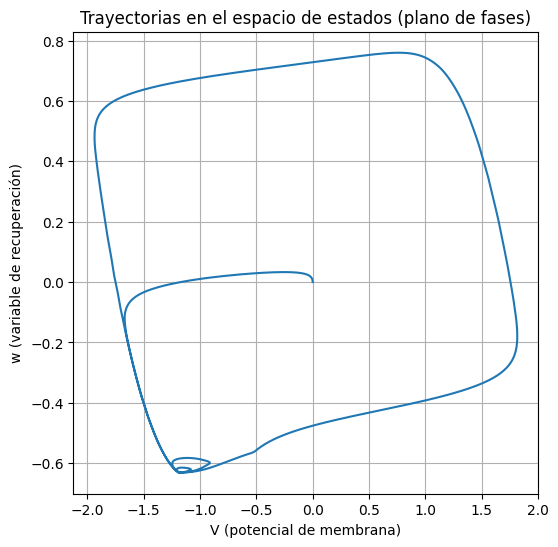

In [ ]:
# --- Trayectorias en el espacio de estados --
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('V (potencial de membrana)')
plt.ylabel('w (variable de recuperación)')
plt.title('Trayectorias en el espacio de estados')
plt.grid(True)
plt.show()

## Ejercicio 3: Retrato de Fase

Aquí se representa visualmente el comportamiento del sistema en el espacio de fases, trazando los campos de vectores para diferentes valores de $V$ y $w$. Un retrato de fase permite identificar las trayectorias y los patrones de estabilidad del sistema.

Usando el valor de corriente $I_{ext}=0$ cree el retrato de fase usando la ayuda del comando *meshgrid* para generar el camo vectorial, y ayúdese del comando de matplotlib *streamplot* para graficarlo. En el mismo gráfico muestre 3 trayectorias representativas con condiciones iniciales a su gusto.

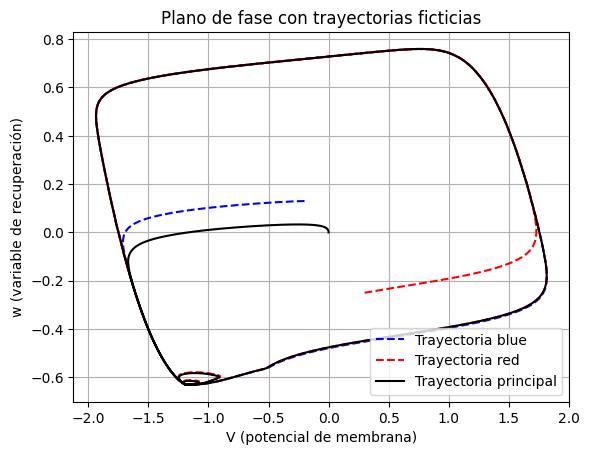

In [ ]:
# Trayectorias ficticias (ligeramente diferentes condiciones iniciales)
offsets = [(-0.2, 0.13), (0.3, -0.25)]
colors = ['blue', 'red']

for off, col in zip(offsets, colors):
    x0_fict = [sol.y[0][0] + off[0], sol.y[1][0] + off[1]]
    sol_fict = solve_ivp(
        fitzhugh_nagumo,
        t_span=(inicio_simulacion, tiempo_simulacion),
        y0=x0_fict,
        t_eval=np.linspace(inicio_simulacion, tiempo_simulacion, 5000),
        method='RK45'
    )
    plt.plot(sol_fict.y[0], sol_fict.y[1], color=col, linestyle='--', label=f'Trayectoria {col}')

# Trayectoria principal
plt.plot(sol.y[0], sol.y[1], color='k', label='Trayectoria principal')

plt.xlabel('V (potencial de membrana)')
plt.ylabel('w (variable de recuperación)')
plt.title('Plano de fase con trayectorias ficticias')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 4: Curvas Nulas (Nullclines)

Las curvas nulas (nullclines) representan las regiones en el espacio de fases donde la derivada de $V$ o $w$ es cero. Estas curvas son útiles para localizar los puntos de equilibrio del sistema.

Curva nula de $V$: $w = V-\frac{V^3}{3}+I_{ext}$.

Curva nula de $w$: $w = \frac{V+a}{b}$

Agregue al retrato de fase las nulclinas.

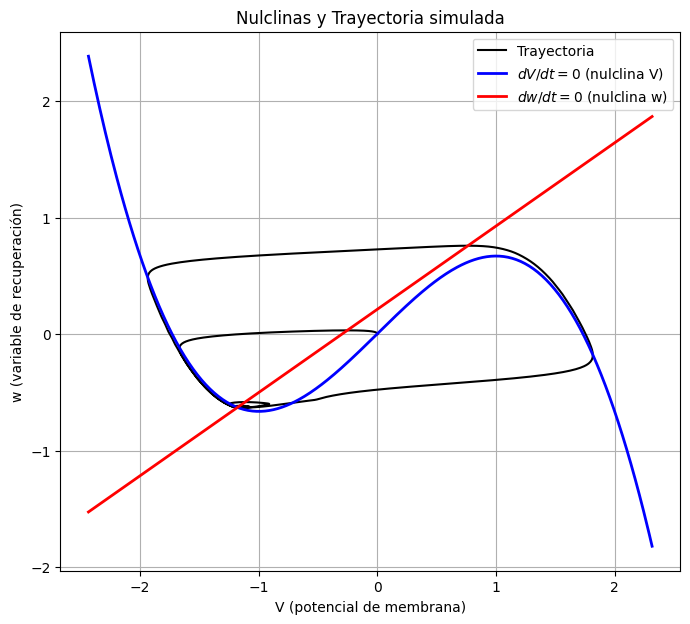

In [ ]:
# Nulclinas
plt.figure(figsize=(8, 7))

# --- Trayectoria del sistema ---
plt.plot(sol.y[0], sol.y[1], color='k', label='Trayectoria')


# --- Nulclinas ---
V_min, V_max = sol.y[0].min() - 0.5, sol.y[0].max() + 0.5
w_min, w_max = sol.y[1].min() - 0.5, sol.y[1].max() + 0.5

I_promedio = np.mean(I_ext) #Promedio de la corriente aplicada
V_line = np.linspace(V_min, V_max, 400)

w_nullcline_V = V_line - V_line**3/3 + I_promedio     # dV/dt = 0
w_nullcline_W = (V_line + a) / b                    # dw/dt = 0

plt.plot(V_line, w_nullcline_V, 'b', linewidth=2, label=r'$dV/dt=0$ (nulclina V)')
plt.plot(V_line, w_nullcline_W, 'r', linewidth=2, label=r'$dw/dt=0$ (nulclina w)')
plt.xlabel('V (potencial de membrana)')
plt.ylabel('w (variable de recuperación)')
plt.title('Nulclinas y Trayectoria simulada')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 5: Puntos de Equilibrio y Estabilidad

Los puntos de equilibrio son las intersecciones de las curvas nulas. O lo que es lo mismo la solución simultánea del r.h.s de la ecuación diferencial,

$$
0=V-\frac{V^3}{3}-w+I\\
0=V+a-bw
$$

De la segunda ecuación tenemos que $w = \frac{1}{b}(V+a)$ y que al ser reeemplazada en la primera nos queda el polinomio cúbico $\frac{1}{3}V^3 + V(\frac{1}{b}-1)+(\frac{a}{b}-I)=0$. Así los equilibrios se hallan econtrando las raíces del polinomio cúbico.

Para determinar la estabilidad de cada equilibrio hallado, calculamos el Jacobiano:

$$
J = \begin{pmatrix} \frac{\partial f_V}{\partial V} & \frac{\partial f_V}{\partial w} \\ \frac{\partial f_w}{\partial V} & \frac{\partial f_w}{\partial w} \end{pmatrix} = \begin{pmatrix} 1 - V^2 & -1 \\ \frac{1}{\tau} & -\frac{b}{\tau} \end{pmatrix}
$$

Evaluamos el Jacobiano en cada punto de equilibrio y calculamos sus valores propios.

Calcule el punto de equilibrio para el sistema que estamos estudiando e identifique si es estable o inestable. Grafíquelo en la figura que estamos haciendo colocando un símbolo relleno en caso de que el punto se estable y un símbolo vacío en caso de que sea inestable.

Pista: Use el comando *roots* de numpy para hallar las raices del polinomio


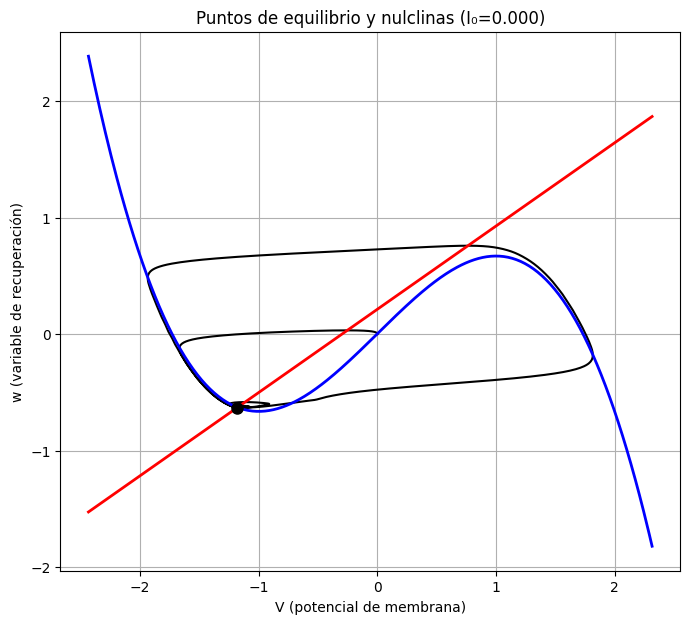

-- Puntos de equilibrio ---
1) V_eq = -1.1834, w_eq = -0.6310  -->  estable


In [ ]:
# Puntos de equilibrio

# Corriente efectiva usada para equilibrio
I0 = 0

# Polinomio cúbico: (1/3)V^3 + V*(1/b - 1) + (a/b - I0) = 0
coeficientes = [1/3, 0, (1/b - 1), (a/b - I0)]

# Raíces reales del polinomio
raices = np.roots(coeficientes)
raices_reales = np.real(raices[np.isreal(raices)])

# Calcular w para cada V de equilibrio
puntos_eq = []
for V_eq in raices_reales:
    w_eq = (V_eq + a) / b
    puntos_eq.append((V_eq, w_eq))

# Análisis de estabilidad (Jacobiano)
estabilidad = []  # 'estable' o 'inestable'

for V_eq, w_eq in puntos_eq:
    J = np.array([
        [1 - 3*V_eq**2, -1],
        [1/tau, -b/tau]
    ])
    valores_propios = np.linalg.eigvals(J)
    if np.all(np.real(valores_propios) < 0):
        estabilidad.append('estable')
    else:
        estabilidad.append('inestable')
plt.figure(figsize=(8, 7))

# Trayectoria
plt.plot(sol.y[0], sol.y[1], color='k', label='Trayectoria simulada')

# Nulclinas
plt.plot(V_line, w_nullcline_V, 'b', linewidth=2, label=r'$dV/dt=0$')
plt.plot(V_line, w_nullcline_W, 'r', linewidth=2, label=r'$dw/dt=0$')

# Puntos de equilibrio
for (V_eq, w_eq), tipo in zip(puntos_eq, estabilidad):
    if tipo == 'estable':
        plt.plot(V_eq, w_eq, 'ko', markersize=8, label='Punto estable')
    else:
        plt.plot(V_eq, w_eq, 'ko', markerfacecolor='none', markersize=8, label='Punto inestable')

# Graficar
plt.xlabel('V (potencial de membrana)')
plt.ylabel('w (variable de recuperación)')
plt.title(f'Puntos de equilibrio y nulclinas (I₀={I0:.3f})')
plt.grid(True)
plt.show()

print("-- Puntos de equilibrio ---")
for i, ((V_eq, w_eq), tipo) in enumerate(zip(puntos_eq, estabilidad), 1):
    print(f"{i}) V_eq = {V_eq:.4f}, w_eq = {w_eq:.4f}  -->  {tipo}")

## Ejercicio 6: Comparación de retratos de fase

Muestre en una figura con 3 paneles diferentes el retrato de fase completo (con todos los elementos calculados en los puntos 2 a 5) del sistema de FN para 3 valores diferentes de corriente: $I_{ext} = 0, 0.2, 0.4$

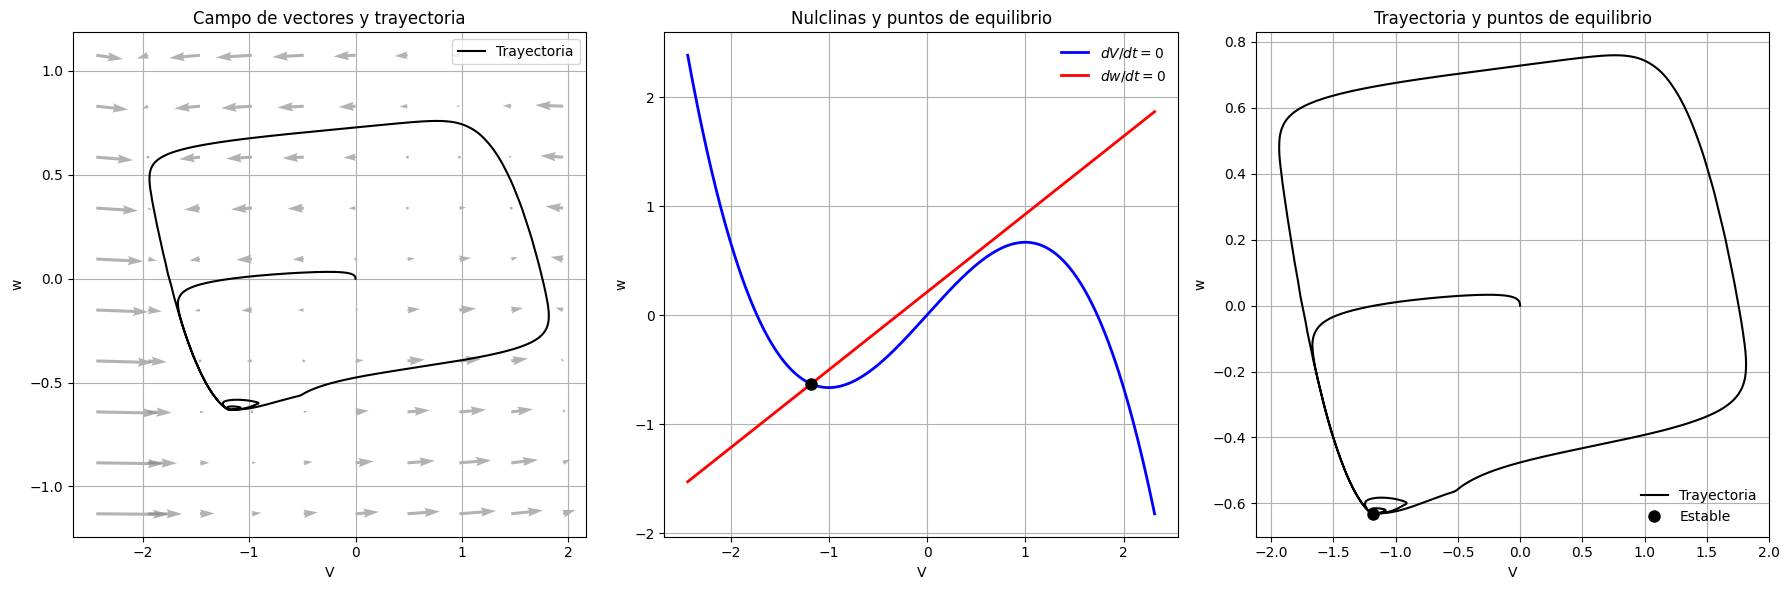

In [ ]:
# Retrato de fase completo

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Panel 1: campo vectorial + trayectoria
skip = (slice(None, None, 4), slice(None, None, 4))
V_grid, W_grid = np.meshgrid(
    np.linspace(V_min, V_max, 40),
    np.linspace(w_min, w_max, 40)
)
dV = V_grid - (V_grid**3)/3 - W_grid + I0
dW = (V_grid + a - b*W_grid) / tau

axs[0].quiver(V_grid[skip], W_grid[skip], dV[skip], dW[skip],
              color='gray', alpha=0.6, scale=25)
axs[0].plot(sol.y[0], sol.y[1], 'k', lw=1.5, label='Trayectoria')
axs[0].set_title("Campo de vectores y trayectoria")
axs[0].set_xlabel("V")
axs[0].set_ylabel("w")
axs[0].legend()
axs[0].grid(True)

# Panel 2: nulclinas + puntos de equilibrio
axs[1].plot(V_line, w_nullcline_V, 'b', linewidth=2, label=r'$dV/dt=0$')
axs[1].plot(V_line, w_nullcline_W, 'r', linewidth=2, label=r'$dw/dt=0$')

for (V_eq, w_eq), tipo in zip(puntos_eq, estabilidad):
    if tipo == 'estable':
        axs[1].plot(V_eq, w_eq, 'ko', markersize=8)
    else:
        axs[1].plot(V_eq, w_eq, 'ko', markerfacecolor='none', markersize=8)

axs[1].set_title("Nulclinas y puntos de equilibrio")
axs[1].set_xlabel("V")
axs[1].set_ylabel("w")
axs[1].legend(frameon=False)
axs[1].grid(True)

# Panel 3: trayectoria + puntos de equilibrio
axs[2].plot(sol.y[0], sol.y[1], color='k', lw=1.5, label='Trayectoria')
for (V_eq, w_eq), tipo in zip(puntos_eq, estabilidad):
    if tipo == 'estable':
        axs[2].plot(V_eq, w_eq, 'ko', markersize=8, label='Estable')
    else:
        axs[2].plot(V_eq, w_eq, 'ko', markerfacecolor='none', markersize=8, label='Inestable')

axs[2].set_title("Trayectoria y puntos de equilibrio")
axs[2].set_xlabel("V")
axs[2].set_ylabel("w")
axs[2].legend(frameon=False)
axs[2].grid(True)

plt.tight_layout()
plt.show()


# **En el siguiente código muestra el comportamiento de cada experimento en un sólo esquema**

# Parámetros del Experimento 1 (Varios pulsos):

```
  "nombre": "Varios pulsos",
  "a": 0.3,
  "b": 1.4,
  "tau": 20,
  "inicio_pulsos": [10, 110, 210],
  "amplitud_pulso": [0.05, 0.1, 0.15],
  "duracion_pulso": 5,
  "tiempo_simulacion": 300,
  "inicio_simulacion": -50
```

# Parámetros del Experimento 2 (Varios pulsos con más amplitud):

```
  "nombre": "Varios pulsos con +amplitud (Ejercicio 6)",
  "a": 0.3,
  "b": 1.4,
  "tau": 20,
  "inicio_pulsos": [10, 110, 210],
  "amplitud_pulso": [0, 0.2, 0.4],
  "duracion_pulso": 5,
  "tiempo_simulacion": 300,
  "inicio_simulacion": -50
```

# Parámetros del Experimento 3 (Un pulso prolongado):

```
  "nombre": "Pulso prolongado (Ejercicio 2)",
  "a": 0.3,
  "b": 1.2,
  "tau": 20,
  "inicio_pulsos": [10],
  "amplitud_pulso": [0.23],
  "duracion_pulso": 250,
  "tiempo_simulacion": 300,
  "inicio_simulacion": -50
```

  Valores propios: [-3.18509563 -0.08605087]
Varios pulsos) V_eq = -1.1834, w_eq = -0.6310  -->  estable


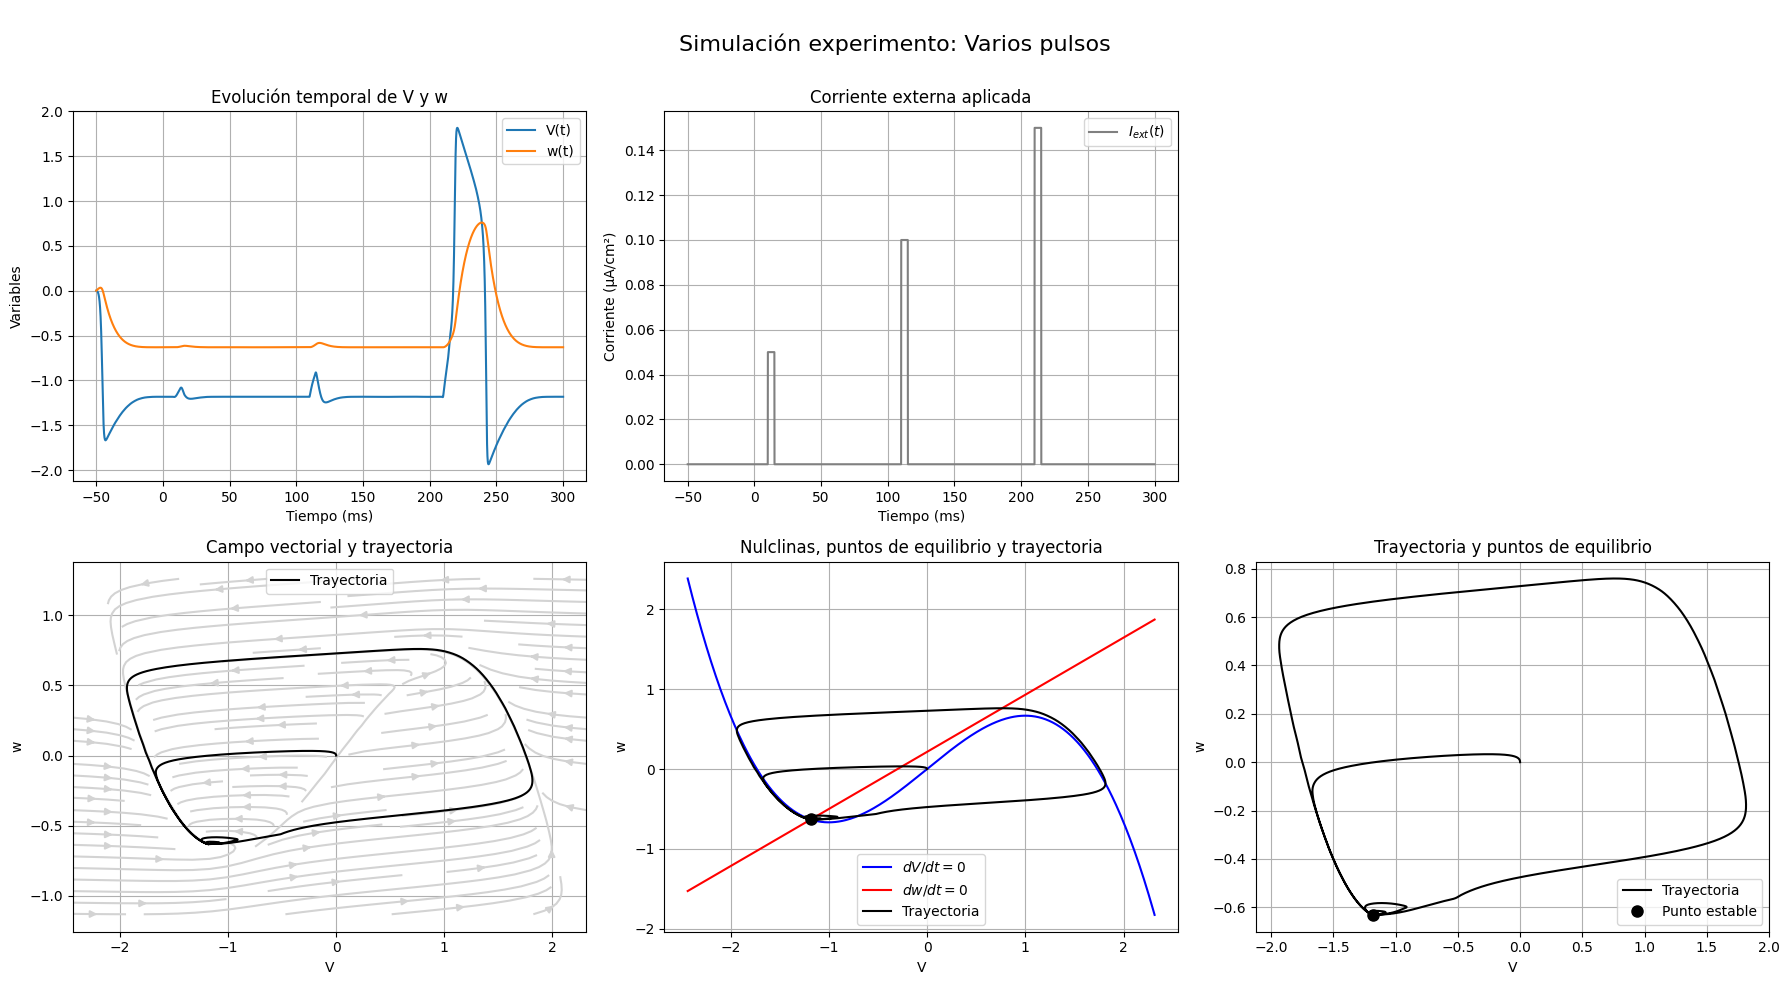



  Valores propios: [-3.18509563 -0.08605087]
Varios pulsos con +amplitud (Ejercicio 6)) V_eq = -1.1834, w_eq = -0.6310  -->  estable


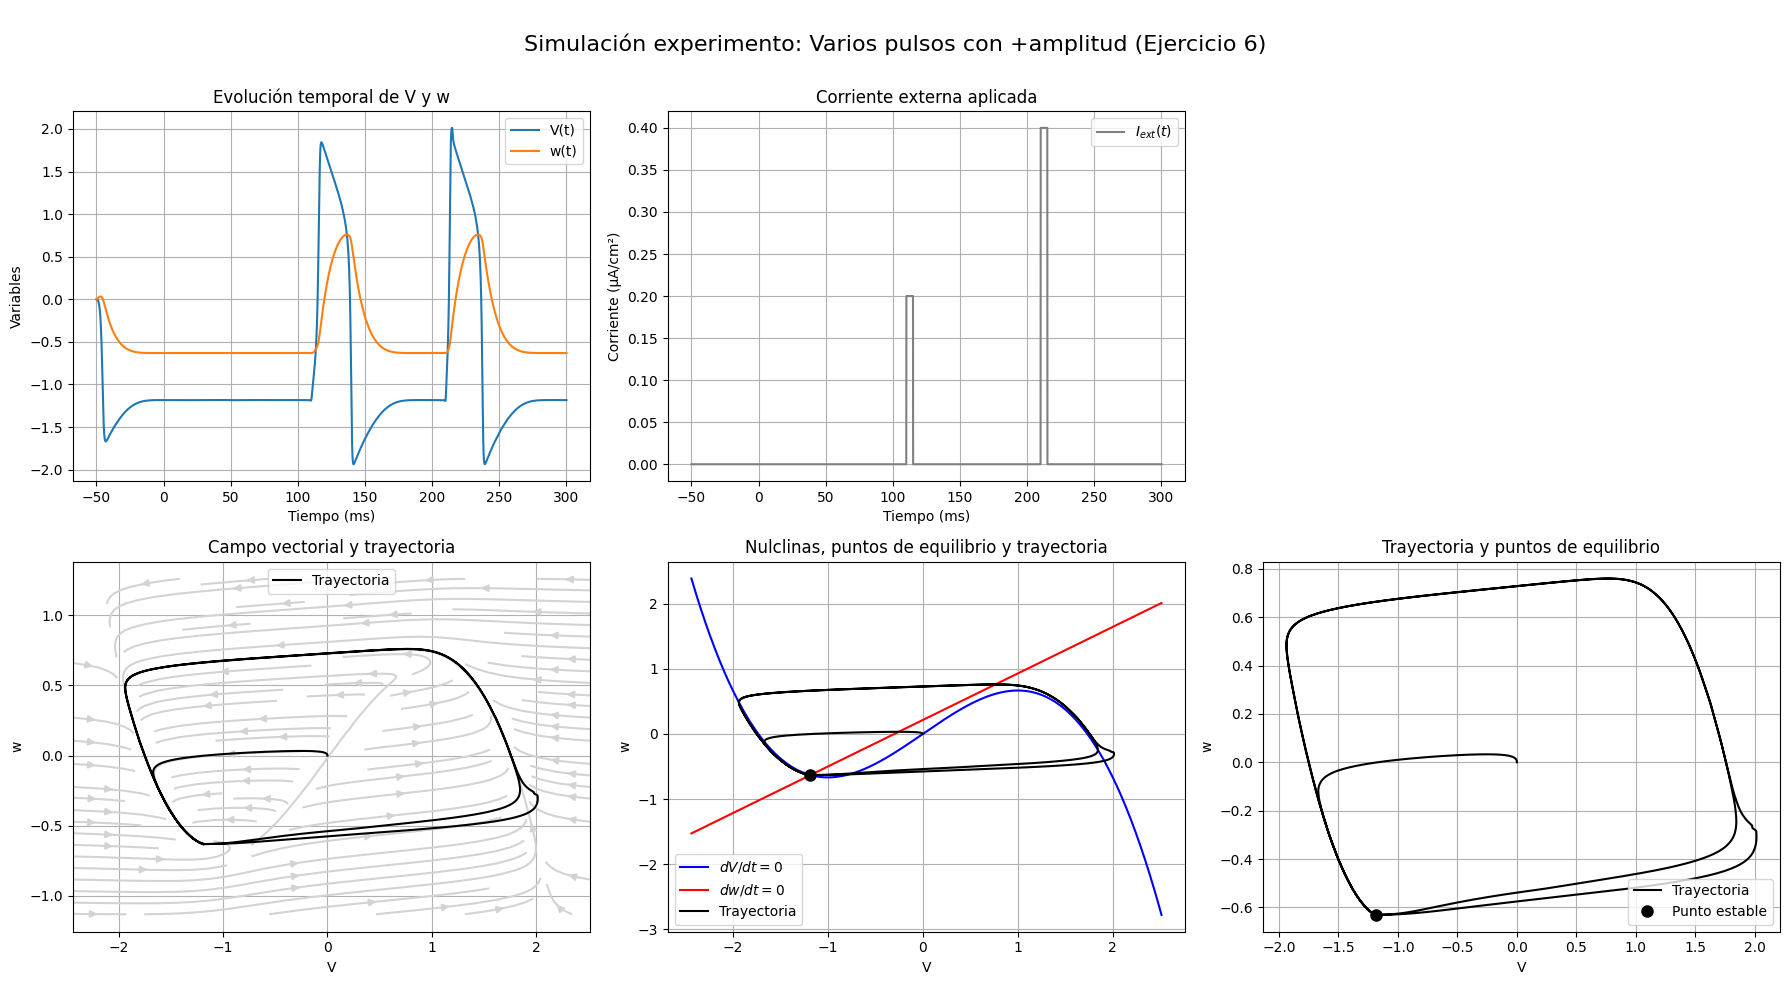



  Valores propios: [-2.54411017 -0.08012793]
Pulso prolongado (Ejercicio 2)) V_eq = -1.0900, w_eq = -0.6583  -->  estable


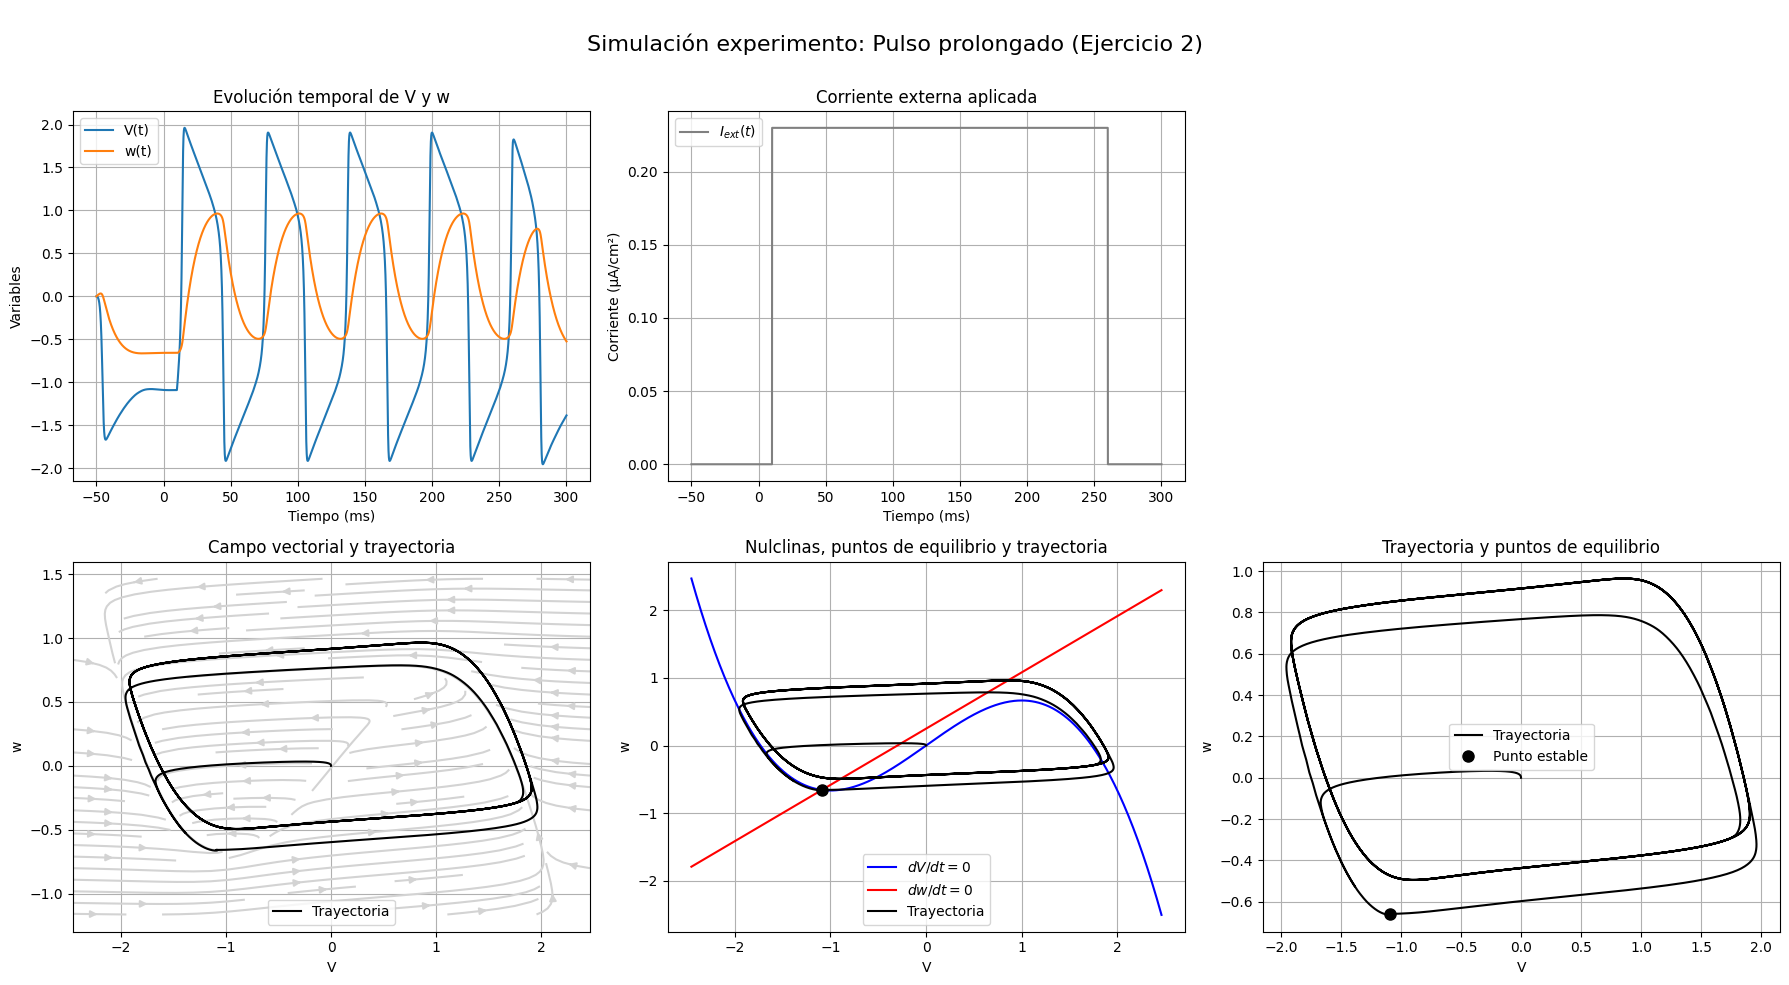

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def simular_fitzhugh_nagumo(exp):

    # --- Parámetros del sistema ---
    a = exp["a"]
    b = exp["b"]
    tau = exp["tau"]
    inicio_pulsos = exp["inicio_pulsos"]
    amplitud_pulso = exp["amplitud_pulso"]
    duracion_pulso = exp["duracion_pulso"]
    tiempo_simulacion = exp["tiempo_simulacion"]
    inicio_simulacion = exp["inicio_simulacion"]

    # --- Definición de la corriente externa ---
    def I_ext_func(t):
        for inicio, amp in zip(inicio_pulsos, amplitud_pulso):
            if inicio <= t <= inicio + duracion_pulso:
                return amp
        return 0.0

    # --- Definición del sistema FitzHugh-Nagumo ---
    def fitzhugh_nagumo(t, x):
        V, w = x
        dV_dt = V - V**3/3 - w + I_ext_func(t)
        dw_dt = (V + a - b*w) / tau
        return [dV_dt, dw_dt]

    # --- Condiciones iniciales e integración ---
    x0 = [0, 0]
    t_span = (inicio_simulacion, tiempo_simulacion)
    t_eval = np.linspace(t_span[0], t_span[1], 10000)

    sol = solve_ivp(fitzhugh_nagumo, t_span, x0, t_eval=t_eval, method='RK45')
    t = sol.t
    I_ext = np.array([I_ext_func(tt) for tt in t])

    # --- Calcular puntos de equilibrio ---
    coef = [1/3, 0, (1/b - 1), (a/b)]
    raices = np.roots(coef)
    raices_reales = np.real(raices[np.isreal(raices)])
    puntos_eq = [(V_eq, (V_eq + a)/b) for V_eq in raices_reales]

    estabilidad = []
    for V_eq, w_eq in puntos_eq:
        J = np.array([
            [1 - 3*V_eq**2, -1],
            [1/tau, -b/tau]
        ])
        valores = np.linalg.eigvals(J)

        print(f"  Valores propios: {valores}")
        if np.all(np.real(valores) < 0):
            estabilidad.append('estable')
        else:
            estabilidad.append('inestable')

    for i, ((V_eq, w_eq), tipo) in enumerate(zip(puntos_eq, estabilidad), 1):
      print(f"{exp['nombre']}) V_eq = {V_eq:.4f}, w_eq = {w_eq:.4f}  -->  {tipo}")

    # --- Crear figura general (2 filas, 3 columnas) ---
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"\nSimulación experimento: {exp['nombre']}\n", fontsize=16)

    # --- (1) Voltaje y w en el tiempo ---
    axs[0, 0].plot(t, sol.y[0], label='V(t)')
    axs[0, 0].plot(t, sol.y[1], label='w(t)')
    axs[0, 0].set_xlabel('Tiempo (ms)')
    axs[0, 0].set_ylabel('Variables')
    axs[0, 0].set_title('Evolución temporal de V y w')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # --- (2) Corriente externa ---
    axs[0, 1].plot(t, I_ext, color='gray', label=r'$I_{ext}(t)$')
    axs[0, 1].set_xlabel('Tiempo (ms)')
    axs[0, 1].set_ylabel('Corriente (μA/cm²)')
    axs[0, 1].set_title('Corriente externa aplicada')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # --- Rango del plano de fases ---
    V_min, V_max = sol.y[0].min() - 0.5, sol.y[0].max() + 0.5
    w_min, w_max = sol.y[1].min() - 0.5, sol.y[1].max() + 0.5
    V_vals = np.linspace(V_min, V_max, 40)
    w_vals = np.linspace(w_min, w_max, 40)
    V_grid, W_grid = np.meshgrid(V_vals, w_vals)

    # --- (3) Campo vectorial y trayectoria ---
    dV = V_grid - V_grid**3/3 - W_grid
    dw = (V_grid + a - b*W_grid) / tau
    axs[1, 0].streamplot(V_grid, W_grid, dV, dw, color='lightgray', density=1.0)
    axs[1, 0].plot(sol.y[0], sol.y[1], 'k', label='Trayectoria')
    axs[1, 0].set_title('Campo vectorial y trayectoria')
    axs[1, 0].set_xlabel('V')
    axs[1, 0].set_ylabel('w')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # --- (4) Nulclinas, puntos de equilibrio y trayectoria ---
    V_line = np.linspace(V_min, V_max, 400)
    w_nullcline_V = V_line - V_line**3/3
    w_nullcline_W = (V_line + a) / b
    axs[1, 1].plot(V_line, w_nullcline_V, 'b', label=r'$dV/dt=0$')
    axs[1, 1].plot(V_line, w_nullcline_W, 'r', label=r'$dw/dt=0$')
    axs[1, 1].plot(sol.y[0], sol.y[1], 'k', label='Trayectoria')

    for (V_eq, w_eq), tipo in zip(puntos_eq, estabilidad):
        if tipo == 'estable':
            axs[1, 1].plot(V_eq, w_eq, 'ko', markersize=8)
        else:
            axs[1, 1].plot(V_eq, w_eq, 'ko', markerfacecolor='none', markersize=8)

    axs[1, 1].set_title('Nulclinas, puntos de equilibrio y trayectoria')
    axs[1, 1].set_xlabel('V')
    axs[1, 1].set_ylabel('w')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # --- (5) Trayectoria + puntos de equilibrio ---
    axs[1, 2].plot(sol.y[0], sol.y[1], color='k', label='Trayectoria')
    for (V_eq, w_eq), tipo in zip(puntos_eq, estabilidad):
        if tipo == 'estable':
            axs[1, 2].plot(V_eq, w_eq, 'ko', markersize=8, label='Punto estable')
        else:
            axs[1, 2].plot(V_eq, w_eq, 'ko', markerfacecolor='none', markersize=8, label='Punto inestable')
    axs[1, 2].set_title('Trayectoria y puntos de equilibrio')
    axs[1, 2].set_xlabel('V')
    axs[1, 2].set_ylabel('w')
    axs[1, 2].legend()
    axs[1, 2].grid(True)

    # --- Ajustes finales ---
    axs[0, 2].axis('off')  # espacio vacío arriba derecha
    plt.tight_layout()
    plt.show()
    print("\n")

experimentos = [
    {
        "nombre": "Varios pulsos",
        "a": 0.3,
        "b": 1.4,
        "tau": 20,
        "inicio_pulsos": [10, 110, 210],
        "amplitud_pulso": [0.05, 0.1, 0.15],
        "duracion_pulso": 5,
        "tiempo_simulacion": 300,
        "inicio_simulacion": -50
    },
    {
        "nombre": "Varios pulsos con +amplitud (Ejercicio 6)",
        "a": 0.3,
        "b": 1.4,
        "tau": 20,
        "inicio_pulsos": [10, 110, 210],
        "amplitud_pulso": [0, 0.2, 0.4],
        "duracion_pulso": 5,
        "tiempo_simulacion": 300,
        "inicio_simulacion": -50
    },
    {
        "nombre": "Pulso prolongado (Ejercicio 2)",
        "a": 0.3,
        "b": 1.2,
        "tau": 20,
        "inicio_pulsos": [10],
        "amplitud_pulso": [0.23],
        "duracion_pulso": 250,
        "tiempo_simulacion": 300,
        "inicio_simulacion": -50
    }
]

# --- Ejecutar todos los experimentos ---
for exp in experimentos:
    simular_fitzhugh_nagumo(exp)


## **Experimento con varios pulsos**

Valores propios: [-3..18509563 -0.08605087] -> Estable

Punto de equilibrio: V_eq = -1.1834, w_eq = -0.6310

## **Experimento con varios pulsos con mayor amplitud**

Valores propios: [-3.18509563 -0.08605087] -> Estable

Punto de equilibrio: V_eq = -1.1834, w_eq = -0.6310

## **Experimento con un pulso prolongado por 250ms**

Valores propios: [-2.54411017 -0.08012793] -> Estable

Punto de equilibrio: V_eq = -1.0900, w_eq = -0.6583

## **Observaciones:**

### **Evolución en el tiempo de V y W**

- Con varios pulsos: Como la amplitud fue baja en los primeros 2 pulsos, no se alcanzaron a generar spikes, así que se observa que la neurona vuelve rápidamente al reposo.

- Con varios pulsos con más amplitud: Al aumentar la amplitud de los pulsos, se generaron 2 spikes en lugar de uno sólo, por lo que decimos que la amplitud de los pulsos aumentan la amplitud de las respuestas.

- Con un sólo pulso sostenido se observa que se generan spikes repetidamente y W oscila de forma sostenida y con mayor amplitud que con varios pulsos.

### **Trayectoria en el espacio de estado**

- Con varios pulsos se observa una pequeña diferencia entre los pulsos de baja amplitud vs los pulsos con alta amplitud, cuando se envía un pulso de baja amplitud la neurona oscina en su fase de recuperación antes de encontrar su punto de equilibrio, cosa que no pasa cuando ampliamos las amplitudes.

- Con varios pulsos, la trayectoria tiende a ser la misma, mientras que si mantenemos el pulso de corriente en el tiempo, el plano de fases explora más regiones, ya que mantener el pulso de corriente fuerza al sistema a estar fuera de su equilibrio y aumentar la amplitud de sus oscilaciones... Por qué ocurre? Porque V recorre más valores posibles (Desde hiperpolarización hasta despolarización).

### **Campo vectorial**

- El campo vectorial entre los experimentos con varios pulsos sólo varía luego de alcanzar el punto de equilibrio, pero luego en un punto de la fase, ambos experimentos parecen tomar la misma trayectoria.

- Aquí si vemos una diferencia notable en el campo vectorial, donde las flechas se alejan del punto de equilibrio generando osilaciones en otras regiones del plano.

### **Nulclinas**

- Entre los experimentos con varios pulsos, las nulclinas se desplazan muy poco, específicamente se desplazarán según el promedio de la corriente inyectada, pero como b (La variable de recuperación) no cambia, el punto donde se interseca la recta, no varía notablemente.

- Cuando mantenemos el pulso constante, la pendiente de la recta varía, ya que la nulclina del voltaje se desplazó hacia arriba... Numéricamente hablando, cuando hablamos de la nuclina de V, hablamos de V - V**3/3 + I, y V' aparece sumando V + I, lo que significa que, si aumento I>0 la nulclina se desplaza hacia arriba ó si I<0 la nulclina se desplaza hacia abajo.

### **Puntos de equilibrio**

- Según los resultados del experimento con varios pulsos, los puntos de equilibrio de ambos sistemas no cambian, por lo que podemos decir que aumentar la amplitud de pulsos cortos no varía la topología de los puntos de equilibrio.

- En el caso en que mantenemos el pulso constante, observamos que los puntos de equilibrio sí cambiaron, ya que el sistema es "menos rápido" para alcanzar el punto de equilibrio gracias a la corriente constante, de hecho, en los Jacobianos vemos la velocidad de recuperación de este sistema, y los autovalores de varios pulsos tienden a recuperarse más rápido que en el pulso constante.